## Digital Labnote for IE project

### Behavioral test (Figure 1) 

    1. Load OKR Gain table from Google Drive 

In [1]:
OKR_Gain <- read.delim(file="G:/My Drive/Experimental Data/Flocculus_Ex vivo/OKR Gain_new.txt", 
                       header=T, 
                       sep='\t', 
                       stringsAsFactors = F)

In [2]:
colnames(OKR_Gain)  <- c("pre", "post", "delta")

In [3]:
OKR_Gain

pre,post,delta
<dbl>,<dbl>,<dbl>
0.304,0.433,0.129
0.320,0.640,0.320
0.195,0.668,0.473
0.275,0.768,0.493
0.198,0.314,0.116
0.267,0.805,0.538
0.246,0.595,0.349
0.320,0.625,0.305
0.315,0.655,0.340


    2. Descriptive Statistics

In [4]:
library(psych) # to use 'describe' function
describe(OKR_Gain)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pre,1,9,0.2711111,0.04948344,0.275,0.2711111,0.0593040,0.195,0.320,0.125,-0.4527580,-1.5390788,0.01649448
post,2,9,0.6114444,0.15356360,0.640,0.6114444,0.0667170,0.314,0.805,0.491,-0.6328194,-0.8300669,0.05118787
delta,3,9,0.3403333,0.14862032,0.340,0.3403333,0.1971858,0.116,0.538,0.422,-0.2424679,-1.4265961,0.04954011


    3. Perform paired t-test

In [5]:
t.test(x = OKR_Gain$pre, y = OKR_Gain$post, paired = T)


	Paired t-test

data:  OKR_Gain$pre and OKR_Gain$post
t = -6.8699, df = 8, p-value = 0.0001284
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4545730 -0.2260936
sample estimates:
mean of the differences 
             -0.3403333 


-------------

### Mean Firing Rate (Figure 3) 

    1. Load mean firing rate table from Google drive

In [27]:
MFR <- read.delim(file="G:/My Drive/Experimental Data/Flocculus_Ex vivo/MFR_TG_new.txt", 
                  sep='\t', 
                  stringsAsFactors = T, 
                  header=T)

In [28]:
head(MFR)

,AnimalID,Protocol,Gain,Trial
,<fct>,<fct>,<dbl>,<fct>
1,150216_HC_YG_#01_tt,HC,58.26657,+100 pA
2,150216_HC_YG_#02_tt,HC,21.26528,+100 pA
3,150216_HC_YG_#03_tt,HC,0.00000,+100 pA
4,150216_HC_YG_#05_tt,HC,0.00000,+100 pA
5,150216_HC_YG_#06_tt,HC,0.00000,+100 pA
6,150216_HC_YG_#09_tt,HC,36.90037,+100 pA


In [29]:
library(dplyr)
group_by(MFR, Protocol)  %>%
    summarise(count = n(), 
              mean = mean(Gain, na.rm=T), 
              sd =sd(Gain, na.rm=T))

Protocol,count,mean,sd
<fct>,<int>,<dbl>,<dbl>
HC,852,87.99020,67.86370
OL,636,73.61124,61.11241


In [5]:
library(lme4) #for generation of Linear Mixed Model
library(nlme) #for generation of Linear Mixed Model
library(multcomp)
library(tidyverse) #for data manipulation and visualization
library(ggpubr) #for creating easily publication ready plots
library(rstatix) # provides pipe-friendly R functions for easy statistical analyses
library(lmerTest)
library(psycho)
library(emmeans) #for post hoc pairwise comparison of interaction in Mixed Effects Model

Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix


ERROR: Error: package or namespace load failed for 'lme4' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'statmod'


    2. Generate Linear Mixed Model

In [99]:
LMM.model <- lme(Gain ~ Protocol + Trial + Protocol*Trial, 
                 random = ~1|AnimalID, 
                 method="REML",
                 data=MFR, 
                 na.action = "na.omit")

In [104]:
a <- aov(Gain~Protocol*Trial+Error(AnimalID), data=MFR)

In [105]:
summary(a)


Error: AnimalID
           Df  Sum Sq Mean Sq F value Pr(>F)  
Protocol    1   75292   75292   5.096 0.0258 *
Residuals 122 1802392   14774                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Error: Within
                 Df  Sum Sq Mean Sq F value  Pr(>F)    
Trial            11 3854100  350373 757.816 < 2e-16 ***
Protocol:Trial   11   13857    1260   2.725 0.00174 ** 
Residuals      1342  620467     462                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [92]:
MFR$interaction <- interaction(MFR$Protocol, MFR$Trial)


In [96]:
LMM.model1 <- lmer(Gain~interaction + (1|AnimalID), data=MFR, na.action = "na.omit")

In [97]:
summary(glht(model=LMM.model1, linfct=mcp(interaction="Tukey")))

Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"
Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"
Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"
Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"
Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"
Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"
Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"
Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"
Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"
Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"
Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"
Warning message in RET$pfunction("adjusted", ...):
"Completion with error > 


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = Gain ~ interaction + (1 | AnimalID), data = MFR, 
    na.action = "na.omit")

Linear Hypotheses:
                               Estimate Std. Error z value Pr(>|z|)    
OL.+100 pA - HC.+100 pA == 0     -1.633      7.385  -0.221   1.0000    
HC.+1000 pA - HC.+100 pA == 0   137.023      3.609  37.969    <0.01 ***
OL.+1000 pA - HC.+100 pA == 0   118.209      7.385  16.007    <0.01 ***
HC.+1100 pA - HC.+100 pA == 0   148.382      3.609  41.116    <0.01 ***
OL.+1100 pA - HC.+100 pA == 0   132.291      7.385  17.914    <0.01 ***
HC.+1200 pA - HC.+100 pA == 0   160.180      3.609  44.385    <0.01 ***
OL.+1200 pA - HC.+100 pA == 0   144.499      7.385  19.567    <0.01 ***
HC.+200 pA - HC.+100 pA == 0     10.066      3.609   2.789   0.3730    
OL.+200 pA - HC.+100 pA == 0      6.842      7.385   0.926   1.0000    
HC.+300 pA - HC.+100 pA == 0     24.058      3.609   6.666   

In [100]:
LMM.model

Linear mixed-effects model fit by REML
  Data: MFR 
  Log-restricted-likelihood: -6829.826
  Fixed: Gain ~ Protocol + Trial + Protocol * Trial 
             (Intercept)               ProtocolOL            Trial+1000 pA 
                5.202026                -1.632501               137.023100 
           Trial+1100 pA            Trial+1200 pA             Trial+200 pA 
              148.382270               160.179608                10.065531 
            Trial+300 pA             Trial+400 pA             Trial+500 pA 
               24.057663                41.613891                63.336646 
            Trial+600 pA             Trial+700 pA             Trial+800 pA 
               79.722399                96.098821               110.361509 
            Trial+900 pA ProtocolOL:Trial+1000 pA ProtocolOL:Trial+1100 pA 
              122.616594               -17.181474               -14.458391 
ProtocolOL:Trial+1200 pA  ProtocolOL:Trial+200 pA  ProtocolOL:Trial+300 pA 
              -14.04

In [101]:
anova(LMM.model)

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,1342,674.669330,0.000000000
Protocol,1,122,5.096349,0.025754477
Trial,11,1342,757.816196,0.000000000
Protocol:Trial,11,1342,2.724550,0.001740899


In [4]:
require(emmeans)

Loading required package: emmeans
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'emmeans'"

In [2]:
library(lsmeans)

ERROR: Error in library(lsmeans): there is no package called 'lsmeans'


In [6]:
emm <- emmeans(fit, ~ Protocol*Trial)
post.hoc <- pairs(emm, adjust="tukey") #'tukey' is default, 'sidak', 'holm'
post.hoc

ERROR: Error in emmeans(fit, ~Protocol * Trial): 함수 "emmeans"를 찾을 수 없습니다


In [87]:
comp.Protocol <- glht(LMM.model, linfct = mcp(Protocol*Trial="Tukey"))

ERROR: Error in parse(text = x, srcfile = src): <text>:1:61: unexpected '='
1: comp.Protocol <- glht(LMM.model, linfct = mcp(Protocol*Trial=
                                                                ^


In [86]:
summary(comp.Protocol)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lme.formula(fixed = Gain ~ Protocol + Trial + Protocol * Trial, 
    data = MFR, random = ~1 | AnimalID, na.action = "na.omit")

Linear Hypotheses:
             Estimate Std. Error z value Pr(>|z|)
OL - HC == 0   -1.633      7.385  -0.221    0.825
(Adjusted p values reported -- single-step method)


    3. Computation of Two-way repeated measures ANOVA

In [70]:
fit  <- lmer(Gain ~ Protocol*Trial +(1|AnimalID), data=MFR)
anova(fit)


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Protocol,2356.271,2356.271,1,122,5.096345,0.025754530
Trial,3726446.777,338767.889,11,1342,732.716182,0.000000000
Protocol:Trial,13856.511,1259.683,11,1342,2.724550,0.001740899


### PB-AHP (Figure 3)

    1. Load PB-AHP table from Google Drive

In [106]:
PB.AHP <- read.delim(file="G:/My Drive/Experimental Data/Flocculus_Ex vivo/PBAHP_TG.txt", 
                  sep='\t', 
                  stringsAsFactors = T, 
                  header=T)

In [107]:
head(PB.AHP)

,AnimalID,Protocol,Gain,Trial
,<fct>,<fct>,<dbl>,<fct>
1,150216_HC_YG_#01_tt,HC_Tonic,9.696228,+100 pA
2,150216_HC_YG_#03_tt,HC_Tonic,2.198822,+100 pA
3,150216_HC_YG_#05_tt,HC_Tonic,2.721176,+100 pA
4,150216_HC_YG_#06_tt,HC_Tonic,3.528900,+100 pA
5,150216_HC_YG_#09_tt,HC_Tonic,4.742615,+100 pA
6,150216_HC_YG_#10_tt,HC_Tonic,9.523437,+100 pA


    2. Generate Linear Mixed Model

In [108]:
LMM1.model <- lme(Gain ~ Protocol*Trial, 
                 random = ~1|AnimalID, 
                 data=PB.AHP, 
                 na.action = "na.omit")

In [109]:
anova(LMM1.model)

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,1276,675.686774,0.0000000000
Protocol,3,116,1.244433,0.2969159533
Trial,11,1276,134.518427,0.0000000000
Protocol:Trial,33,1276,2.146290,0.0001933045


In [110]:
comp.Protocol <- glht(LMM1.model, linfct = mcp(Protocol="Tukey"))

Warning message in mcp2matrix(model, linfct = linfct):
"covariate interactions found -- default contrast might be inappropriate"


In [111]:
summary(comp.Protocol)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lme.formula(fixed = Gain ~ Protocol * Trial, data = PB.AHP, random = ~1 | 
    AnimalID, na.action = "na.omit")

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)
HC_Tonic - HC_Gap == 0     0.6041     1.1081   0.545    0.946
OL_Gap - HC_Gap == 0      -0.3710     1.4385  -0.258    0.994
OL_Tonic - HC_Gap == 0     0.1420     1.1472   0.124    0.999
OL_Gap - HC_Tonic == 0    -0.9750     1.1449  -0.852    0.823
OL_Tonic - HC_Tonic == 0  -0.4620     0.7467  -0.619    0.923
OL_Tonic - OL_Gap == 0     0.5130     1.1827   0.434    0.971
(Adjusted p values reported -- single-step method)


-------------------------

### AP Onset latency

1. Load AP_Onse_TG table from Google Drive

In [23]:
AP.Onset <- read.delim(file="G:/My Drive/Experimental Data/Flocculus_Ex vivo/AP_Onset_TG.txt",
                      sep='\t', stringsAsFactors = T, header=T)

In [24]:
head(AP.Onset)

,AnimalID,Protocol,Gain,Trial
,<fct>,<fct>,<dbl>,<fct>
1,150216_HC_YG_#01_tt,HC,87.6,+100 pA
2,150216_HC_YG_#02_tt,HC,307.6,+100 pA
3,150216_HC_YG_#03_tt,HC,NA,+100 pA
4,150216_HC_YG_#04_tg,HC,NA,+100 pA
5,150216_HC_YG_#05_tt,HC,NA,+100 pA
6,150216_HC_YG_#06_tt,HC,NA,+100 pA


In [25]:
LMM1.model <- lme(Gain ~ Protocol*Trial, 
                 random = ~1|AnimalID, 
                 data=AP.Onset, 
                 na.action = "na.omit")

In [26]:
anova(LMM1.model)

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,1011,131.103552,0.00000000
Protocol,1,122,2.156003,0.14458727
Trial,11,1011,63.133230,0.00000000
Protocol:Trial,11,1011,1.822379,0.04619634


In [37]:
fit  <- lmer(Gain ~ Protocol*Trial +(1|AnimalID), data=AP.Onset)
anova(fit)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Protocol,6296.469,6296.469,1,139.6848,2.494776,1.164865e-01
Trial,1660878.672,150988.970,11,1013.0847,59.824589,3.463075e-102
Protocol:Trial,50593.753,4599.432,11,1013.0847,1.822379,4.619331e-02


In [102]:
emm1 <- emmeans(fit, ~Protocol*Trial)
post.hoc <- pairs(emm1, adjust="tukey")
post.hoc

 contrast                      estimate   SE   df t.ratio p.value
 (HC +100 pA) - (OL +100 pA)       1.63 7.38  218   0.221 1.0000 
 (HC +100 pA) - (HC +1000 pA)   -137.02 3.61 1342 -37.969 <.0001 
 (HC +100 pA) - (OL +1000 pA)   -118.21 7.38  218 -16.007 <.0001 
 (HC +100 pA) - (HC +1100 pA)   -148.38 3.61 1342 -41.116 <.0001 
 (HC +100 pA) - (OL +1100 pA)   -132.29 7.38  218 -17.914 <.0001 
 (HC +100 pA) - (HC +1200 pA)   -160.18 3.61 1342 -44.385 <.0001 
 (HC +100 pA) - (OL +1200 pA)   -144.50 7.38  218 -19.567 <.0001 
 (HC +100 pA) - (HC +200 pA)     -10.07 3.61 1342  -2.789 0.4463 
 (HC +100 pA) - (OL +200 pA)      -6.84 7.38  218  -0.926 1.0000 
 (HC +100 pA) - (HC +300 pA)     -24.06 3.61 1342  -6.666 <.0001 
 (HC +100 pA) - (OL +300 pA)     -15.07 7.38  218  -2.041 0.9307 
 (HC +100 pA) - (HC +400 pA)     -41.61 3.61 1342 -11.531 <.0001 
 (HC +100 pA) - (OL +400 pA)     -27.79 7.38  218  -3.763 0.0389 
 (HC +100 pA) - (HC +500 pA)     -63.34 3.61 1342 -17.550 <.0001 
 (HC +100 

-----

### Single AP Analysis

### 1. AP Threshold

    1. Load AP threshold table

In [50]:
AP_threshold <- read.delim(file="G:/My Drive/Experimental Data/Flocculus_Ex vivo/AP threshold.txt")
head(AP_threhold)

,Group,AP_threshold
,<fct>,<dbl>
1,WT_Tonic,-40.64941
2,WT_Tonic,-33.05054
3,WT_Tonic,-38.60474
4,WT_Tonic,-21.39282
5,WT_Tonic,-41.50391
6,WT_Tonic,-34.48486


    2. Visualize AP threshold data

In [51]:
library("ggpubr")

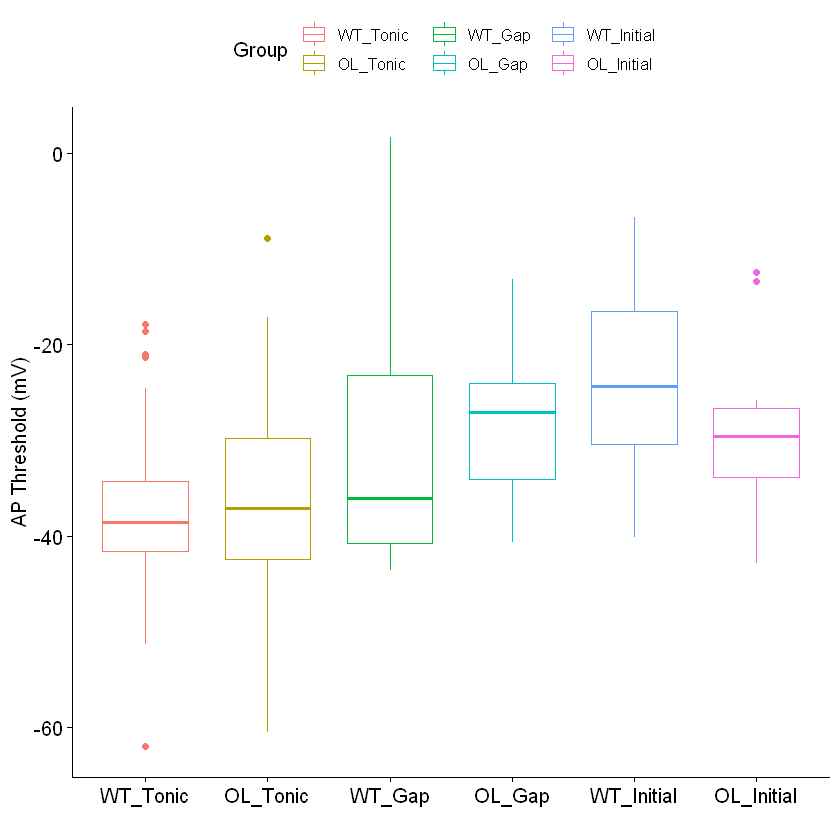

In [53]:
ggboxplot(AP_threshold, 
          x="Group", 
          y="AP_threshold", 
          color="Group", 
          order = c("WT_Tonic", "OL_Tonic", "WT_Gap", "OL_Gap", "WT_Initial", "OL_Initial"),
          ylab="AP Threshold (mV)", xlab="")

    3. Compute one-way ANOVA

In [55]:
res.aov <- aov(AP_threshold~Group, data=AP_threshold)
summary(res.aov)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Group         5   3558   711.7   8.034 1.01e-06 ***
Residuals   147  13022    88.6                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

    If ANOVA test is significant, we can compute Tukey HSD (Tukey Honest Significant Differences) for performing mutiple pairwise-comparison between the means of groups.

In [58]:
TukeyHSD(res.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = AP_threshold ~ Group, data = AP_threshold)

$Group
                            diff        lwr         upr     p adj
OL_Initial-OL_Gap      -1.968021 -12.659897  8.72385585 0.9948106
OL_Tonic-OL_Gap        -8.928426 -17.873892  0.01703947 0.0507456
WT_Gap-OL_Gap          -3.352043 -14.232061  7.52797460 0.9484706
WT_Initial-OL_Gap       3.057692  -7.071054 13.18643690 0.9526585
WT_Tonic-OL_Gap       -10.209947 -18.855479 -1.56441460 0.0106584
OL_Tonic-OL_Initial    -6.960406 -15.400062  1.47925086 0.1695565
WT_Gap-OL_Initial      -1.384023 -11.852128  9.08408289 0.9989281
WT_Initial-OL_Initial   5.025712  -4.659221 14.71064517 0.6657932
WT_Tonic-OL_Initial    -8.241926 -16.362989 -0.12086273 0.0444902
WT_Gap-OL_Tonic         5.576383  -3.100389 14.25315456 0.4335783
WT_Initial-OL_Tonic    11.986118   4.272295 19.69994039 0.0002073
WT_Tonic-OL_Tonic      -1.281520  -6.907958  4.34491726 0.9861